Max-min and Min-max

In [98]:
import numpy as np
import pandas as pd
import math

In [99]:
df = pd.read_csv('cVRPsTW250_1.csv')

# FFNC

In [100]:
dist = []
for ii in range(df.shape[0]):
  temp=[]
  for jj in range(df.shape[0]):
    ab = float(math.dist((df['LAT'][ii],df['LON'][ii]), (df['LAT'][jj],df['LON'][jj])))
    temp.append(ab/1000)     #km
  dist.append(temp)

In [101]:
dist_df = pd.DataFrame(dist[0:])
dist_df 

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.000000,8.240410,10.674138,1.397607,8.389598,9.141289,4.734397,9.575229,10.083012,5.846273,...,0.608367,6.362621,9.801299,5.335157,8.913005,6.753334,6.300866,6.476291,2.970534,3.684295
1,8.240410,0.000000,16.379957,9.612500,9.993506,11.641359,12.939036,17.077734,9.102054,5.882576,...,8.646040,14.468307,3.872818,13.548098,3.283257,14.878878,8.469654,7.227256,5.373495,5.507846
2,10.674138,16.379957,0.000000,10.338118,18.937221,19.407519,8.587151,14.798831,10.531263,10.653132,...,10.077236,11.053623,15.309748,9.989117,14.808327,7.741740,16.923621,9.549861,11.898346,14.035528
3,1.397607,9.612500,10.338118,0.000000,8.607456,9.107361,3.462375,8.289045,11.088468,7.051875,...,1.230637,4.969064,11.176850,3.943102,10.293115,5.532754,6.649287,7.522572,4.368125,4.782870
4,8.389598,9.993506,18.937221,8.607456,0.000000,1.709324,11.240060,10.720884,16.916069,12.358776,...,8.948277,10.566838,13.615790,10.599133,12.810502,13.165446,2.151764,13.561091,8.705026,6.121969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,6.753334,14.878878,7.741740,5.532754,13.165446,13.118196,2.088629,7.060171,13.694295,10.931372,...,6.267861,3.412608,15.728484,2.670408,14.919605,0.000000,11.553237,10.731615,9.505482,10.315614
247,6.300866,8.469654,16.923621,6.649287,2.151764,3.399158,9.543795,10.211487,14.838396,10.266880,...,6.875521,9.299095,11.884247,9.110189,11.040670,11.553237,0.000000,11.441114,6.580284,4.034756
248,6.476291,7.227256,9.549861,7.522572,13.561091,14.759851,9.440920,15.710065,3.610759,1.411811,...,6.324488,12.001326,5.787118,10.721391,5.258665,10.731615,11.441114,0.000000,4.861011,7.448244
249,2.970534,5.373495,11.898346,4.368125,8.705026,9.907900,7.582435,12.394154,8.315516,3.740751,...,3.300785,9.329324,6.902591,8.299216,6.002355,9.505482,6.580284,4.861011,0.000000,2.620685


In [102]:
depot_data = pd.DataFrame({
    'Distance':dist_df[0],
    'Demand':df['ORDERWEIGHT']
})

depot_data.drop(0,axis=0,inplace = True)
depot_data.sum(axis=0)

Distance    1588.509245
Demand      1301.000000
dtype: float64

In [103]:
distmat = dist_df.iloc[1:,1:].copy(deep = True)
for i in range(distmat.shape[0]):
    distmat.iloc[i,i] = 100
distmat

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
1,100.000000,16.379957,9.612500,9.993506,11.641359,12.939036,17.077734,9.102054,5.882576,4.324249,...,8.646040,14.468307,3.872818,13.548098,3.283257,14.878878,8.469654,7.227256,5.373495,5.507846
2,16.379957,100.000000,10.338118,18.937221,19.407519,8.587151,14.798831,10.531263,10.653132,16.967369,...,10.077236,11.053623,15.309748,9.989117,14.808327,7.741740,16.923621,9.549861,11.898346,14.035528
3,9.612500,10.338118,100.000000,8.607456,9.107361,3.462375,8.289045,11.088468,7.051875,7.894153,...,1.230637,4.969064,11.176850,3.943102,10.293115,5.532754,6.649287,7.522572,4.368125,4.782870
4,9.993506,18.937221,8.607456,100.000000,1.709324,11.240060,10.720884,16.916069,12.358776,5.674049,...,8.948277,10.566838,13.615790,10.599133,12.810502,13.165446,2.151764,13.561091,8.705026,6.121969
5,11.641359,19.407519,9.107361,1.709324,100.000000,11.325123,9.770177,18.204739,13.626665,7.337778,...,9.650611,10.226468,15.199699,10.472056,14.375429,13.118196,3.399158,14.759851,9.907900,7.417877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,14.878878,7.741740,5.532754,13.165446,13.118196,2.088629,7.060171,13.694295,10.931372,13.419096,...,6.267861,3.412608,15.728484,2.670408,14.919605,100.000000,11.553237,10.731615,9.505482,10.315614
247,8.469654,16.923621,6.649287,2.151764,3.399158,9.543795,10.211487,14.838396,10.266880,4.319253,...,6.875521,9.299095,11.884247,9.110189,11.040670,11.553237,100.000000,11.441114,6.580284,4.034756
248,7.227256,9.549861,7.522572,13.561091,14.759851,9.440920,15.710065,3.610759,1.411811,9.319108,...,6.324488,12.001326,5.787118,10.721391,5.258665,10.731615,11.441114,100.000000,4.861011,7.448244
249,5.373495,11.898346,4.368125,8.705026,9.907900,7.582435,12.394154,8.315516,3.740751,5.109052,...,3.300785,9.329324,6.902591,8.299216,6.002355,9.505482,6.580284,4.861011,100.000000,2.620685


In [104]:
Q = 50 # vehicle capacity

j=1
cluster = dict()

while depot_data.shape[0] != 0:
  cluster.update({j:[0]})
  cap = 0 
  pt = depot_data['Distance'].idxmax()
  cap += depot_data['Demand'][pt]

  while cap < Q:
    pt_new = distmat[pt].idxmin()
    distmat.drop(pt,axis=0,inplace = True)
    distmat.drop(pt,axis=1,inplace = True)
    depot_data.drop(pt,axis=0,inplace = True)
    cluster[j].append(pt)
    pt = pt_new
    if depot_data.size == 0:
      break
    cap += depot_data['Demand'][pt]

  print(cluster[j])

  j += 1

[0, 48, 50, 175, 134, 18, 4, 115, 164, 194]
[0, 35, 99, 170, 88, 112, 218, 181, 71, 158]
[0, 34, 47, 43, 2, 12, 178, 38]
[0, 20, 15, 41, 103, 230, 204, 114, 96, 228, 97]
[0, 49, 147, 56, 101, 117, 146, 123, 124, 110, 211]
[0, 197, 7, 226, 64, 54, 107, 131, 234, 143, 77]
[0, 13, 40, 237, 207, 221, 188, 140, 165]
[0, 8, 44, 187, 9, 85, 95, 180, 113, 173, 52, 195]
[0, 30, 232, 76, 26, 203, 72, 245, 14]
[0, 33, 1, 200, 223, 154, 37, 55, 42]
[0, 25, 10, 153, 98, 78, 179, 222, 136, 250]
[0, 243, 184, 17, 82, 163, 51, 191, 239]
[0, 5, 162, 45, 192, 247, 100, 206, 21, 68]
[0, 31, 39, 89, 53, 205, 202, 159, 189, 210, 161, 156]
[0, 177, 171, 172, 168, 183, 236, 227, 169, 111, 104, 81, 145]
[0, 141, 235, 79, 74, 59, 57, 66, 65]
[0, 193, 86, 126, 233, 186, 209, 149, 46, 185, 182]
[0, 36, 102, 22, 94, 121, 75, 80, 118, 61]
[0, 91, 135, 108, 92, 208, 190, 137]
[0, 128, 214, 246, 176, 32, 244, 240, 148]
[0, 248, 127, 16, 155, 19, 11, 144, 73]
[0, 242, 217, 199, 109, 70, 166, 84, 213, 151]
[0, 24, 152

In [105]:
sum = 0
for i in list(cluster.keys()):
  print(f"{i} : {cluster[i]}")
  sum += len(cluster[i]) - 1

print(sum)

1 : [0, 48, 50, 175, 134, 18, 4, 115, 164, 194]
2 : [0, 35, 99, 170, 88, 112, 218, 181, 71, 158]
3 : [0, 34, 47, 43, 2, 12, 178, 38]
4 : [0, 20, 15, 41, 103, 230, 204, 114, 96, 228, 97]
5 : [0, 49, 147, 56, 101, 117, 146, 123, 124, 110, 211]
6 : [0, 197, 7, 226, 64, 54, 107, 131, 234, 143, 77]
7 : [0, 13, 40, 237, 207, 221, 188, 140, 165]
8 : [0, 8, 44, 187, 9, 85, 95, 180, 113, 173, 52, 195]
9 : [0, 30, 232, 76, 26, 203, 72, 245, 14]
10 : [0, 33, 1, 200, 223, 154, 37, 55, 42]
11 : [0, 25, 10, 153, 98, 78, 179, 222, 136, 250]
12 : [0, 243, 184, 17, 82, 163, 51, 191, 239]
13 : [0, 5, 162, 45, 192, 247, 100, 206, 21, 68]
14 : [0, 31, 39, 89, 53, 205, 202, 159, 189, 210, 161, 156]
15 : [0, 177, 171, 172, 168, 183, 236, 227, 169, 111, 104, 81, 145]
16 : [0, 141, 235, 79, 74, 59, 57, 66, 65]
17 : [0, 193, 86, 126, 233, 186, 209, 149, 46, 185, 182]
18 : [0, 36, 102, 22, 94, 121, 75, 80, 118, 61]
19 : [0, 91, 135, 108, 92, 208, 190, 137]
20 : [0, 128, 214, 246, 176, 32, 244, 240, 148]
21 : [0

In [106]:
depot_data = pd.DataFrame({
    'Distance':dist_df[0],
    'Demand':df['ORDERWEIGHT']
})

depot_data.drop(0,axis=0,inplace = True)
depot_data

,Distance,Demand
1,8.240410,5
2,10.674138,5
3,1.397607,5
4,8.389598,6
5,9.141289,3
...,...,...
246,6.753334,7
247,6.300866,5
248,6.476291,5
249,2.970534,7


In [107]:
util = dict()

for i in list(cluster.keys()):
  cap = 0
  for vals in cluster[i]:
    if vals != 0:
      cap += depot_data['Demand'][vals]
  util.update({i:cap/Q})

In [108]:
import matplotlib.pyplot as plt

0.9292857142857143


Text(0.5, 1.0, 'Max-Min Q = 50')

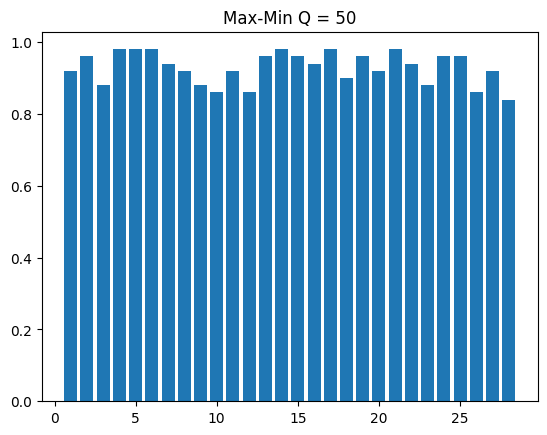

In [109]:
print(np.array(list(util.values())).mean())

plt.bar(list(util.keys()),list(util.values()))
plt.title('Max-Min Q = 50')

# NFNC


In [110]:
dist = []
for ii in range(df.shape[0]):
  temp=[]
  for jj in range(df.shape[0]):
    ab = float(math.dist((df['LAT'][ii],df['LON'][ii]), (df['LAT'][jj],df['LON'][jj])))
    temp.append(ab/1000)     #km
  dist.append(temp)

In [111]:
dist_df = pd.DataFrame(dist[0:])
dist_df 

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.000000,8.240410,10.674138,1.397607,8.389598,9.141289,4.734397,9.575229,10.083012,5.846273,...,0.608367,6.362621,9.801299,5.335157,8.913005,6.753334,6.300866,6.476291,2.970534,3.684295
1,8.240410,0.000000,16.379957,9.612500,9.993506,11.641359,12.939036,17.077734,9.102054,5.882576,...,8.646040,14.468307,3.872818,13.548098,3.283257,14.878878,8.469654,7.227256,5.373495,5.507846
2,10.674138,16.379957,0.000000,10.338118,18.937221,19.407519,8.587151,14.798831,10.531263,10.653132,...,10.077236,11.053623,15.309748,9.989117,14.808327,7.741740,16.923621,9.549861,11.898346,14.035528
3,1.397607,9.612500,10.338118,0.000000,8.607456,9.107361,3.462375,8.289045,11.088468,7.051875,...,1.230637,4.969064,11.176850,3.943102,10.293115,5.532754,6.649287,7.522572,4.368125,4.782870
4,8.389598,9.993506,18.937221,8.607456,0.000000,1.709324,11.240060,10.720884,16.916069,12.358776,...,8.948277,10.566838,13.615790,10.599133,12.810502,13.165446,2.151764,13.561091,8.705026,6.121969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,6.753334,14.878878,7.741740,5.532754,13.165446,13.118196,2.088629,7.060171,13.694295,10.931372,...,6.267861,3.412608,15.728484,2.670408,14.919605,0.000000,11.553237,10.731615,9.505482,10.315614
247,6.300866,8.469654,16.923621,6.649287,2.151764,3.399158,9.543795,10.211487,14.838396,10.266880,...,6.875521,9.299095,11.884247,9.110189,11.040670,11.553237,0.000000,11.441114,6.580284,4.034756
248,6.476291,7.227256,9.549861,7.522572,13.561091,14.759851,9.440920,15.710065,3.610759,1.411811,...,6.324488,12.001326,5.787118,10.721391,5.258665,10.731615,11.441114,0.000000,4.861011,7.448244
249,2.970534,5.373495,11.898346,4.368125,8.705026,9.907900,7.582435,12.394154,8.315516,3.740751,...,3.300785,9.329324,6.902591,8.299216,6.002355,9.505482,6.580284,4.861011,0.000000,2.620685


In [112]:
depot_data = pd.DataFrame({
    'Distance':dist_df[0],
    'Demand':df['ORDERWEIGHT']
})

depot_data.drop(0,axis=0,inplace = True)
depot_data.sum(axis=0)

Distance    1588.509245
Demand      1301.000000
dtype: float64

In [113]:
distmat = dist_df.iloc[1:,1:].copy(deep = True)
for i in range(distmat.shape[0]):
    distmat.iloc[i,i] = 100
distmat

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
1,100.000000,16.379957,9.612500,9.993506,11.641359,12.939036,17.077734,9.102054,5.882576,4.324249,...,8.646040,14.468307,3.872818,13.548098,3.283257,14.878878,8.469654,7.227256,5.373495,5.507846
2,16.379957,100.000000,10.338118,18.937221,19.407519,8.587151,14.798831,10.531263,10.653132,16.967369,...,10.077236,11.053623,15.309748,9.989117,14.808327,7.741740,16.923621,9.549861,11.898346,14.035528
3,9.612500,10.338118,100.000000,8.607456,9.107361,3.462375,8.289045,11.088468,7.051875,7.894153,...,1.230637,4.969064,11.176850,3.943102,10.293115,5.532754,6.649287,7.522572,4.368125,4.782870
4,9.993506,18.937221,8.607456,100.000000,1.709324,11.240060,10.720884,16.916069,12.358776,5.674049,...,8.948277,10.566838,13.615790,10.599133,12.810502,13.165446,2.151764,13.561091,8.705026,6.121969
5,11.641359,19.407519,9.107361,1.709324,100.000000,11.325123,9.770177,18.204739,13.626665,7.337778,...,9.650611,10.226468,15.199699,10.472056,14.375429,13.118196,3.399158,14.759851,9.907900,7.417877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,14.878878,7.741740,5.532754,13.165446,13.118196,2.088629,7.060171,13.694295,10.931372,13.419096,...,6.267861,3.412608,15.728484,2.670408,14.919605,100.000000,11.553237,10.731615,9.505482,10.315614
247,8.469654,16.923621,6.649287,2.151764,3.399158,9.543795,10.211487,14.838396,10.266880,4.319253,...,6.875521,9.299095,11.884247,9.110189,11.040670,11.553237,100.000000,11.441114,6.580284,4.034756
248,7.227256,9.549861,7.522572,13.561091,14.759851,9.440920,15.710065,3.610759,1.411811,9.319108,...,6.324488,12.001326,5.787118,10.721391,5.258665,10.731615,11.441114,100.000000,4.861011,7.448244
249,5.373495,11.898346,4.368125,8.705026,9.907900,7.582435,12.394154,8.315516,3.740751,5.109052,...,3.300785,9.329324,6.902591,8.299216,6.002355,9.505482,6.580284,4.861011,100.000000,2.620685


In [114]:
Q = 50 # vehicle capacity

j=1
cluster = dict()

while depot_data.shape[0] != 0:
  cluster.update({j:[0]})
  cap = 0 
  pt = depot_data['Distance'].idxmin()
  cap += depot_data['Demand'][pt]

  while cap < Q:
    pt_new = distmat[pt].idxmin()
    distmat.drop(pt,axis=0,inplace = True)
    distmat.drop(pt,axis=1,inplace = True)
    depot_data.drop(pt,axis=0,inplace = True)
    cluster[j].append(pt)
    pt = pt_new
    if depot_data.size == 0:
      break
    cap += depot_data['Demand'][pt]

  print(cluster[j])

  j += 1

[0, 167, 241, 62, 229, 60, 129, 23, 151, 142]
[0, 144, 73, 160, 174, 224, 93, 120, 83, 67]
[0, 201, 106, 58, 63, 198, 150, 157, 196]
[0, 3, 84, 166, 70, 27, 213, 220, 139, 125, 238, 6, 182]
[0, 11, 19, 29, 105, 122, 116, 87, 216]
[0, 130, 212, 215, 225, 219, 119, 133, 231, 250, 136, 222]
[0, 239, 249, 69, 132, 191, 51, 195, 163, 82, 52]
[0, 206, 21, 100, 78, 98, 97, 153, 179]
[0, 155, 173, 127, 16, 42, 9, 187, 85, 95]
[0, 138, 152, 24, 113, 180, 248, 44, 55, 232]
[0, 28, 17, 37, 154, 14, 211, 245, 203, 72, 110]
[0, 199, 217, 121, 94, 75, 80, 118, 61, 53]
[0, 109, 240, 148, 244, 32, 46, 185, 104, 183]
[0, 68, 205, 202, 159, 189, 210, 89, 36, 161, 156]
[0, 90, 208, 92, 108, 137, 190, 246]
[0, 247, 45, 192, 115, 164, 194, 114, 96, 41]
[0, 242, 126, 233, 186, 86, 193, 65, 66, 57]
[0, 176, 145, 81, 236, 227, 169, 111, 172, 168, 149, 209]
[0, 228, 10, 25, 33, 147, 49, 56, 101, 117, 146]
[0, 12, 178, 38, 135, 91, 128, 214]
[0, 22, 102, 59, 74, 141, 235, 79, 131, 234]
[0, 188, 140, 165, 171, 1

In [115]:
sum = 0
for i in list(cluster.keys()):
  print(f"{i} : {cluster[i]}")
  sum += len(cluster[i]) - 1

print(sum)

1 : [0, 167, 241, 62, 229, 60, 129, 23, 151, 142]
2 : [0, 144, 73, 160, 174, 224, 93, 120, 83, 67]
3 : [0, 201, 106, 58, 63, 198, 150, 157, 196]
4 : [0, 3, 84, 166, 70, 27, 213, 220, 139, 125, 238, 6, 182]
5 : [0, 11, 19, 29, 105, 122, 116, 87, 216]
6 : [0, 130, 212, 215, 225, 219, 119, 133, 231, 250, 136, 222]
7 : [0, 239, 249, 69, 132, 191, 51, 195, 163, 82, 52]
8 : [0, 206, 21, 100, 78, 98, 97, 153, 179]
9 : [0, 155, 173, 127, 16, 42, 9, 187, 85, 95]
10 : [0, 138, 152, 24, 113, 180, 248, 44, 55, 232]
11 : [0, 28, 17, 37, 154, 14, 211, 245, 203, 72, 110]
12 : [0, 199, 217, 121, 94, 75, 80, 118, 61, 53]
13 : [0, 109, 240, 148, 244, 32, 46, 185, 104, 183]
14 : [0, 68, 205, 202, 159, 189, 210, 89, 36, 161, 156]
15 : [0, 90, 208, 92, 108, 137, 190, 246]
16 : [0, 247, 45, 192, 115, 164, 194, 114, 96, 41]
17 : [0, 242, 126, 233, 186, 86, 193, 65, 66, 57]
18 : [0, 176, 145, 81, 236, 227, 169, 111, 172, 168, 149, 209]
19 : [0, 228, 10, 25, 33, 147, 49, 56, 101, 117, 146]
20 : [0, 12, 178, 38

In [116]:
depot_data = pd.DataFrame({
    'Distance':dist_df[0],
    'Demand':df['ORDERWEIGHT']
})

depot_data.drop(0,axis=0,inplace = True)
depot_data

,Distance,Demand
1,8.240410,5
2,10.674138,5
3,1.397607,5
4,8.389598,6
5,9.141289,3
...,...,...
246,6.753334,7
247,6.300866,5
248,6.476291,5
249,2.970534,7


In [117]:
util = dict()

for i in list(cluster.keys()):
  cap = 0
  for vals in cluster[i]:
    if vals != 0:
      cap += depot_data['Demand'][vals]
  util.update({i:cap/Q})

In [118]:
import matplotlib.pyplot as plt

0.9292857142857143


Text(0.5, 1.0, 'Max-Min Q = 50')

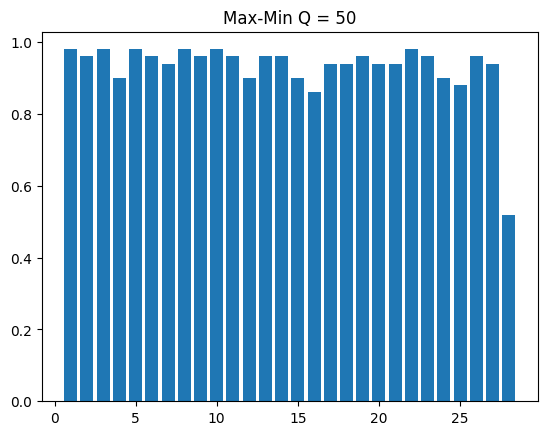

In [119]:
print(np.array(list(util.values())).mean())

plt.bar(list(util.keys()),list(util.values()))
plt.title('Max-Min Q = 50')